<h1>Import necessary libraries</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew

In [2]:
#our train and test dataframe
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

<h1>Visualization and work with missing data</h1>

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
print("Number of missing data is", df_train.isna().sum().sum())

Number of missing data is 6965


<AxesSubplot:title={'center':'Missing Columns'}, ylabel='% of missing'>

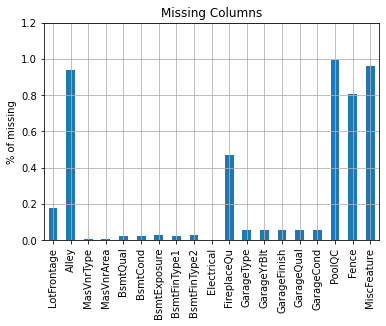

In [5]:
missing_values = df_train.isna().sum(axis=0)/df_train.shape[0]
missing_values = missing_values.loc[missing_values > 0]
missing_values.sort_values(ascending=True)
missing_values.plot( kind='bar',
                     title = 'Missing Columns',
                     ylabel = '% of missing',
                     ylim = (0,1.2),
                     grid = True
                   )

In [6]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

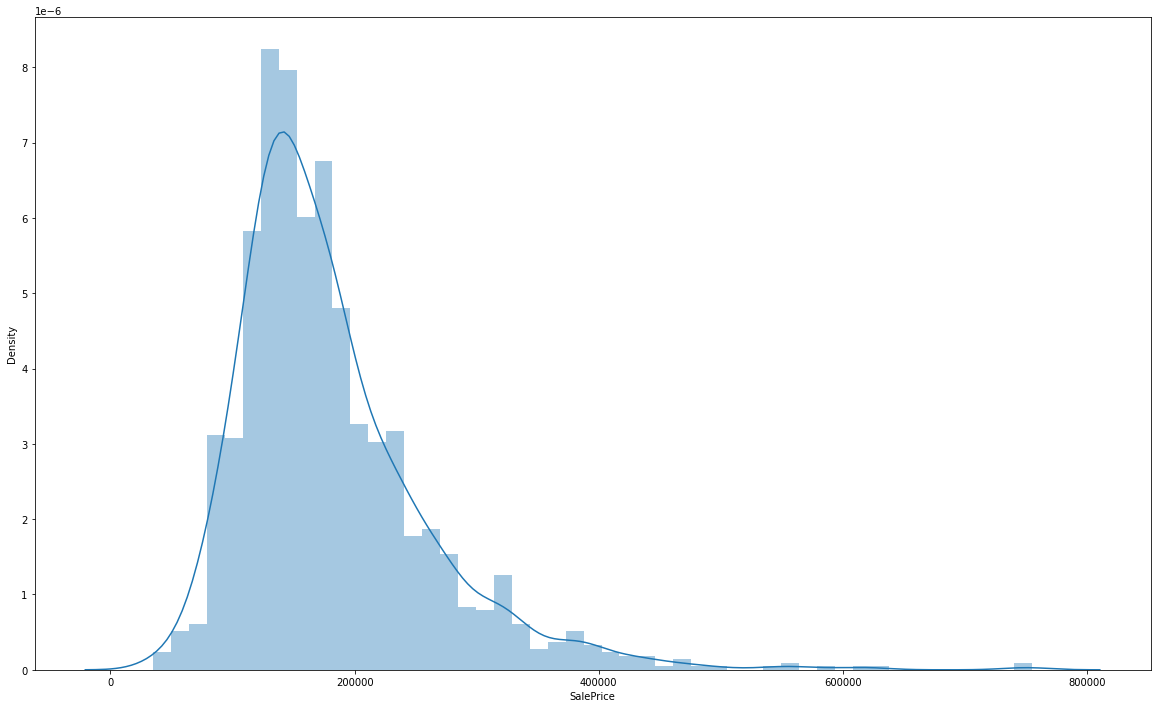

In [7]:
plt.figure(figsize=(20,12))
sns.distplot(df_train["SalePrice"])

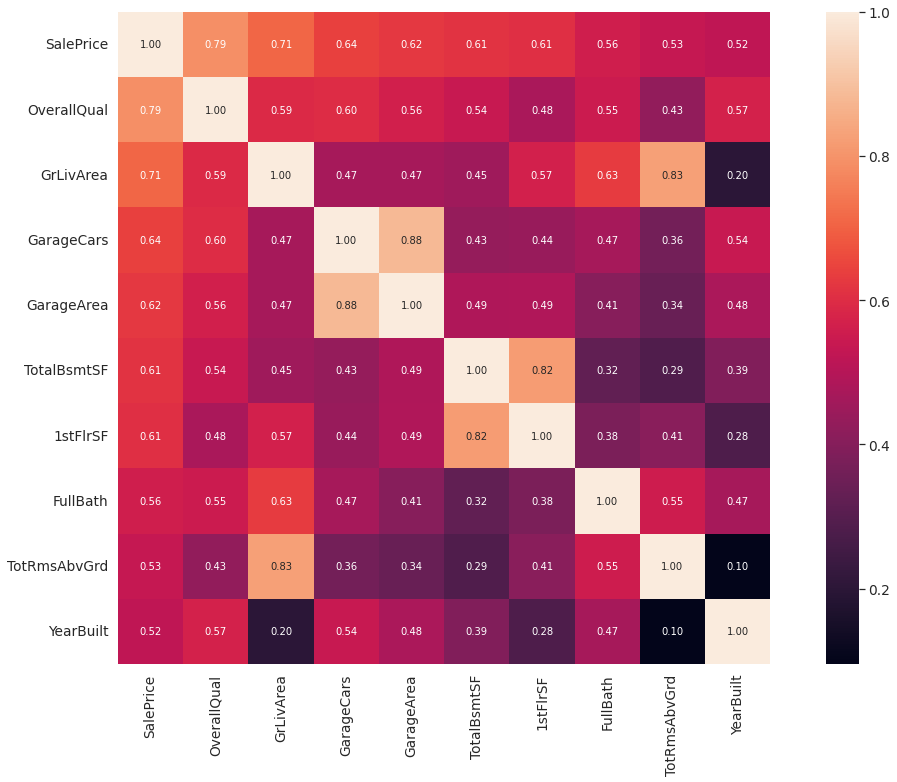

In [8]:
#saleprice correlation matrix
corrmat = df_train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(20,12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
y_train = df_train["SalePrice"]

In [11]:
train_and_test_df = pd.concat([df_train, df_test], axis = 0)
train_and_test_df = train_and_test_df.drop(["Id", "SalePrice"], axis = 1)

In [12]:
number_of_missing_df = train_and_test_df.isnull().sum().sort_values()
percent_of_missing_df = ((train_and_test_df.isnull().sum() / train_and_test_df.isnull().count())*100).sort_values()

In [13]:
missing_df = pd.concat([number_of_missing_df,
                        percent_of_missing_df],
                        keys = ["total number of missing data", 'total percent of missing data'],
                        axis = 1)


print(missing_df.head(10), "\n")
print(missing_df.tail(10))

              total number of missing data  total percent of missing data
MSSubClass                               0                            0.0
Foundation                               0                            0.0
Heating                                  0                            0.0
CentralAir                               0                            0.0
1stFlrSF                                 0                            0.0
2ndFlrSF                                 0                            0.0
LowQualFinSF                             0                            0.0
GrLivArea                                0                            0.0
FullBath                                 0                            0.0
HalfBath                                 0                            0.0 

              total number of missing data  total percent of missing data
GarageFinish                           159                       5.447071
GarageYrBlt                         

In [14]:
train_and_test_df = train_and_test_df.drop((missing_df[missing_df["total number of missing data"] > 5]).index, axis = 1)
train_and_test_df.isnull().sum().sort_values(ascending = False)

MSZoning         4
Functional       2
BsmtFullBath     2
BsmtHalfBath     2
Utilities        2
                ..
ExterCond        0
Foundation       0
Heating          0
CentralAir       0
SaleCondition    0
Length: 61, dtype: int64

In [15]:
numeric_data = [column for column in train_and_test_df.select_dtypes(["int", "float"])]
categoric_data = [column for column in train_and_test_df.select_dtypes(exclude = ["int", "float"])]

for col in numeric_data:
    train_and_test_df[col].fillna(train_and_test_df[col].median(), inplace = True)
        
for col in categoric_data:
    train_and_test_df[col].fillna(train_and_test_df[col].value_counts().index[0], inplace = True)

In [16]:
print("Number of missing data is", train_and_test_df.isna().sum().sum())

Number of missing data is 0


In [17]:
# select numeric variables of the dataset
numeric_data = [column for column in train_and_test_df.select_dtypes(["int", "float"])]

# check skew degree
vars_skewed = train_and_test_df[numeric_data].apply(lambda x: skew(x)).sort_values()

# fix skew 
for var in vars_skewed.index:
    train_and_test_df[var] = np.log1p(train_and_test_df[var])
train_and_test_df = train_and_test_df.drop(["GarageArea", "1stFlrSF", "TotRmsAbvGrd"],
                                          axis = 1)

train_and_test_df = pd.get_dummies(train_and_test_df, drop_first = True)
train_and_test_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,2.079442,1.791759,7.602900,7.602900,6.561031,0.0,5.017280,6.753438,...,0,0,0,0,1,0,0,0,1,0
1,3.044522,9.169623,1.945910,2.197225,7.589336,7.589336,6.886532,0.0,5.652489,7.141245,...,0,0,0,0,1,0,0,0,1,0
2,4.110874,9.328212,2.079442,1.791759,7.601902,7.602401,6.188264,0.0,6.075346,6.825460,...,0,0,0,0,1,0,0,0,1,0
3,4.262680,9.164401,2.079442,1.791759,7.557995,7.586296,5.379897,0.0,6.293419,6.629363,...,0,0,0,0,1,0,0,0,0,0
4,4.110874,9.565284,2.197225,1.791759,7.601402,7.601402,6.486161,0.0,6.196444,7.044033,...,0,0,0,0,1,0,0,0,1,0


In [18]:
#split our data
X_train = train_and_test_df[:len(df_train)]
X_test = train_and_test_df[len(df_train):]

In [19]:
X_train.shape, X_test.shape

((1460, 189), (1459, 189))

<h1>It's time to make robots work for people</h1>

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

In [21]:
reg = GradientBoostingRegressor(random_state=42, loss='ls', learning_rate=0.1)

In [22]:
reg.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(loss='ls', random_state=42)

In [23]:
y_pred = reg.predict(X_test)

In [24]:
reg.score(X_train, y_train)

0.9634303244770946

In [25]:
submission = pd.DataFrame()
submission["Id"] = df_test["Id"]
submission["SalePrice"] = y_pred
submission.to_csv("submission.csv", index = False)

<h2 align="right">See you, Spacecowboy...</h2>